In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code
1.   Implement (from scratch, no specialized library) and apply PCA and LDA to MNIST to find 2 dimensional spaces.
2.   Visualize them by plotting the samples and coloring each point by label for both algorithms.

In [2]:
# load data
import six.moves.cPickle as pickle
import gzip
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

def load_data(dataset):
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    print('... data has been loaded!')
    return train_set, valid_set, test_set


#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

Loading data...
... data has been loaded!


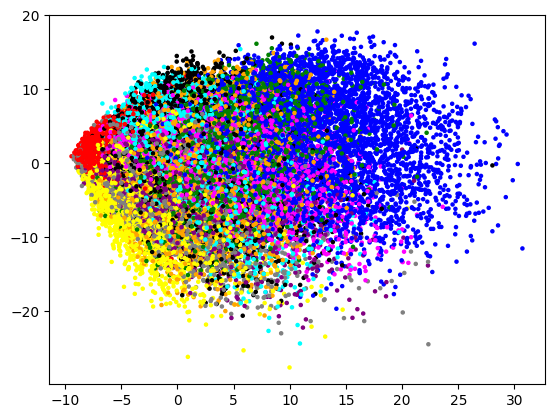

In [13]:
std = np.std(train_x, axis=0)
std[std == 0] = 1
data = (train_x - np.mean(train_x, axis=0))/std
cov = np.cov(data,rowvar=False)
eigval, eigvec = np.linalg.eig(cov)
n_col = np.argsort(eigval)[::-1][:2]
eigen = eigvec[:,n_col]
pca = data.dot(eigen)

colors = np.array(['blue','red','green','orange','purple','cyan','magenta','yellow','black','gray'])

plt.scatter(pca[:,0],pca[:,1],c=colors[train_y],s=5)
plt.show()


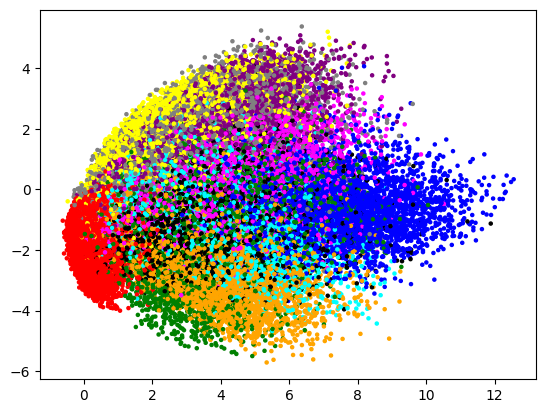

In [15]:
mean_total = train_x.mean(axis=0)
means = []
for i in range(10):
  mean = train_x[train_y==i].mean(axis=0)
  means.append(mean)

scatter_w = np.zeros((784,784))
for i,mean in zip(range(10),means):
  class_scatter = np.zeros((784,784))
  for row in train_x[train_y==i]:
    row,mean = row.reshape(784,1),mean.reshape(784,1)
    class_scatter += (row-mean).dot((row-mean).T)
  scatter_w += class_scatter

scatter_b = np.zeros((784,784))
for i,mean in enumerate(means):
  n = train_x[train_y==i,:].shape[0]
  mean = mean.reshape(784,1)
  mean_total = mean_total.reshape(784,1)
  scatter_b += (mean - mean_total).dot((mean - mean_total).T)

eigval,eigvec = np.linalg.eig(scatter_w.dot(scatter_b))
eigen_pairs = [(np.abs(eigval[i]),eigvec[:,i]) for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

W = np.hstack((eigen_pairs[0][1].reshape(784,1),eigen_pairs[1][1].reshape(784,1)))

lda = train_x.dot(W)

plt.scatter(lda[:,0],lda[:,1],c=colors[train_y],s=5)
plt.show()


##Report


1.   In general terms, what is the goal of dimensionality reduction? What kind of information can it provide us?
2.   Compare PCA and LDA algorithms in terms of: mathematical computation, type of algorithm (supervised or unsupervised), efficiency, etc. What are the pros and cons of each algorithm? (ex. PCA = variance preservation, unsupervised; LDA = class separability, supervised, etc.)
3.   Observe the two resulting clustered images. Which method made the 'better' separation of the data w.r.t. the labels? (you can provide a quantifiable metric for separability if you want.)
4.  In practice, high-dimensional datasets are common. How can dimensionality reduction help subsequent algorithms?
5.   Conclude with some thoughts and things you learned from this homework.

1. The goal of dementionality reduction is to reduce the cost of computing so that we can get out of curse of dimentionality. Less dimention can have information loss but these algorithms make us to keep as much information as possible. It can provide something like the maximized preseved varience of the data after reduction.

2. PCA is an unsupervised algorithm, that it compute the eigen vector base on covarience so that it can maximize preserving varience of whole data. LDA is supervised algorithm, that it uses varience of classes so that it can maximize preserving varience between classes.

3. with respect to labels, LDA is better at seperation the data since PCA is unsupervised and it only considers varience of whole data. However LDA is focusing on varience of classes which is labels of the data.

4. The time complexity of the algorithm will be significantly reduced by dimention reduction. Also data will be more fit for many algorithms.

5. The way dimention is reduced is really interesting and need to learn more about it. Therefor this assignment was really hard and meaningful.